In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import progressbar


In [2]:
train_protein_ids = np.load("./dataset/train_ids.npy")
test_protein_ids = np.load("./dataset/test_ids.npy")


#train_embeddings = np.load('./dataset/train_embeds.npy')
#train_embeddings = np.load('./dataset/2048_MAXLENGTH_train_squence.npy')
train_embeddings = np.load('./dataset/1024_MAXLENGTH_train_squence.npy')

In [3]:
train_terms = pd.read_csv("./dataset/train_terms.tsv", sep = "\t")

In [4]:
# train embedding column count
column_num = train_embeddings.shape[1]

In [5]:
train_data = pd.DataFrame(train_embeddings, columns = ["Column_" + str(i) for i in range(1, column_num+1)])
#train_data = train_df_2048


In [6]:
train_data

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_1015,Column_1016,Column_1017,Column_1018,Column_1019,Column_1020,Column_1021,Column_1022,Column_1023,Column_1024
0,0.155392,0.035353,0.089697,-0.250368,0.248972,-0.032696,-0.073959,0.011420,-0.064566,-0.149671,...,-0.031426,-0.067552,-0.070645,-0.108290,0.036037,-0.180188,-0.099818,-0.039517,-0.073583,0.045931
1,-0.072051,0.093415,-0.002660,-0.005692,0.113906,-0.010813,-0.101786,0.021194,-0.012389,-0.028103,...,0.064644,-0.020896,-0.120011,-0.104605,-0.033120,0.030716,0.002714,-0.019166,-0.022669,0.072778
2,0.143780,0.019153,0.086995,-0.215062,0.219808,-0.028687,-0.101207,0.031871,-0.043015,-0.121150,...,-0.037286,-0.064872,-0.082310,-0.189828,0.027312,-0.189435,-0.097486,-0.054417,-0.042178,0.059392
3,-0.037359,0.007037,0.083136,-0.116787,-0.000757,-0.025243,-0.105427,0.070486,0.069642,-0.031957,...,0.103480,-0.023106,-0.105887,-0.105809,0.004708,-0.051759,-0.020585,-0.078935,-0.056302,0.011840
4,0.134157,0.035627,0.092638,-0.181336,0.196127,-0.028752,-0.089066,0.031362,-0.039287,-0.114085,...,-0.079310,-0.003805,-0.094771,-0.124049,-0.015014,-0.155917,-0.068633,-0.071745,-0.022955,0.034193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142241,0.147929,0.038236,0.088560,-0.186308,0.215773,-0.020082,-0.096749,0.025047,-0.042503,-0.134126,...,-0.108391,-0.005825,-0.103199,-0.129677,-0.014649,-0.183368,-0.080375,-0.078769,-0.026517,0.042060
142242,0.131828,0.054219,0.077887,-0.148568,0.224928,-0.022521,-0.123447,0.021246,-0.056432,-0.146565,...,-0.196388,0.050541,-0.114763,-0.071523,-0.074057,-0.159375,-0.049020,-0.104436,-0.025143,0.002702
142243,0.089361,0.011512,0.060915,-0.149445,0.049561,-0.019799,-0.057202,0.071967,0.096673,-0.026753,...,-0.109178,0.044165,-0.170317,-0.164219,0.040793,-0.024062,-0.021582,-0.056287,-0.030201,0.051645
142244,0.143352,0.017191,0.101269,-0.212221,0.226264,-0.027657,-0.094190,0.037489,-0.048262,-0.123396,...,-0.049111,-0.051377,-0.089795,-0.158856,0.013364,-0.199180,-0.089999,-0.072951,-0.050119,0.049581


In [7]:
train_terms

,EntryID,term,aspect
0,A0A009IHW8,GO:0008152,BPO
1,A0A009IHW8,GO:0034655,BPO
2,A0A009IHW8,GO:0072523,BPO
3,A0A009IHW8,GO:0044270,BPO
4,A0A009IHW8,GO:0006753,BPO
...,...,...,...
5363858,X5L565,GO:0050649,MFO
5363859,X5L565,GO:0016491,MFO
5363860,X5M5N0,GO:0005515,MFO
5363861,X5M5N0,GO:0005488,MFO


In [8]:
num_of_labels = 1500

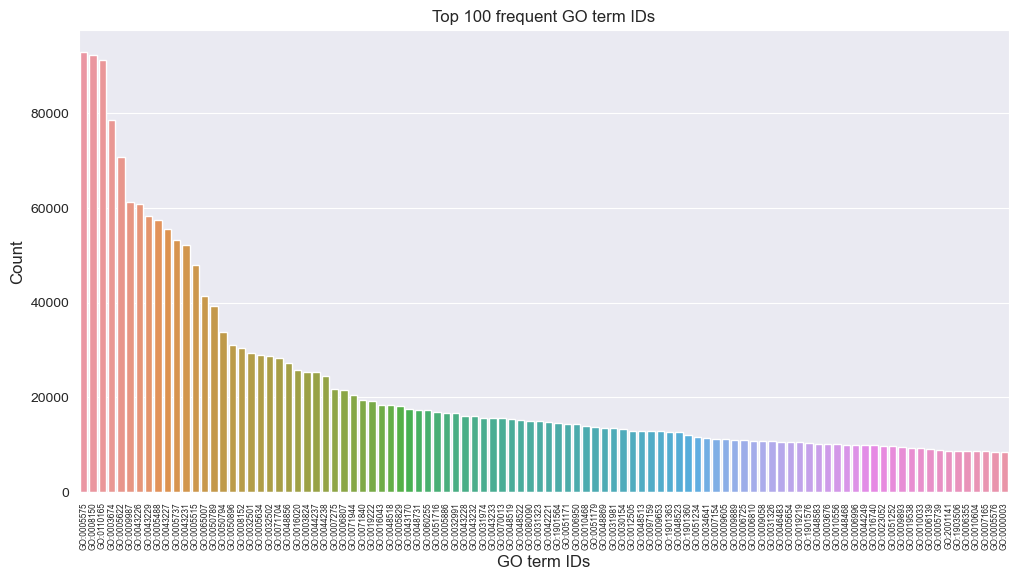

In [9]:
plot_df = train_terms['term'].value_counts().iloc[:100]
figure, axis = plt.subplots(1, 1, figsize=(12, 6))
bp = sns.barplot(ax=axis, x=np.array(plot_df.index), y=plot_df.values)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size = 6)
axis.set_title('Top 100 frequent GO term IDs')
bp.set_xlabel("GO term IDs", fontsize = 12)
bp.set_ylabel("Count", fontsize = 12)
plt.show()

The number of unique terms is:  31466
The ratio of the top 1500 Terms is:  0.8241703786990832
The ratio of the top 2000 Terms is:  0.8570979534712203


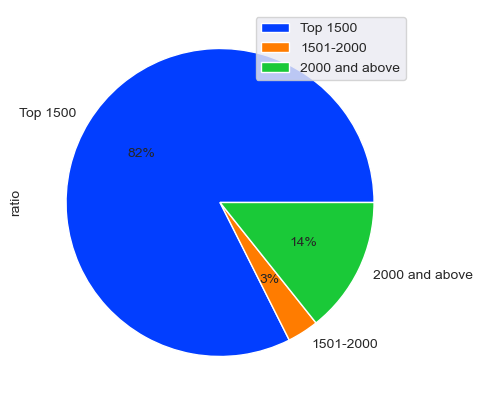

In [10]:
#Get the ratio of the top 1500, 1501-2000, 2000 and above
print("The number of unique terms is: ", train_terms['term'].nunique())
count_df = train_terms['term'].value_counts().iloc[:1500]
ratio1 = count_df.values / train_terms.shape[0]
print("The ratio of the top 1500 Terms is: ", ratio1.sum())

count_df2 = train_terms['term'].value_counts().iloc[:2000]
ratio2 = count_df2.values / train_terms.shape[0]
print("The ratio of the top 2000 Terms is: ", ratio2.sum())

#Pie chart of ratio of the top 1500, 1501-2000, 2000 and above
palette_color = sns.color_palette('bright')
pie_df = pd.DataFrame({'ratio': [ratio1.sum(), ratio2.sum()-ratio1.sum(), 1-ratio2.sum()]}, index=['Top 1500', '1501-2000', '2000 and above'])
pie_df.plot.pie(y='ratio', figsize=(5, 5), autopct='%.0f%%', colors=palette_color)
plt.show()

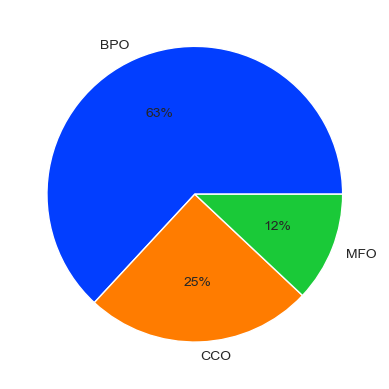

In [11]:
num_of_labels = 1500

labels = train_terms['term'].value_counts().index[:num_of_labels].tolist()
train_terms_updated = train_terms.loc[train_terms['term'].isin(labels)]
pie_df = train_terms_updated['aspect'].value_counts()
palette_color = sns.color_palette('bright')
plt.pie(pie_df.values, labels=np.array(pie_df.index), colors=palette_color, autopct='%.0f%%')
plt.show()

In [12]:
bar = progressbar.ProgressBar(maxval=num_of_labels, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])

In [13]:
full_size = train_protein_ids.shape[0] # len(X)
full_labels = np.zeros((full_size ,num_of_labels))

In [14]:
series_train_protein_ids = pd.Series(train_protein_ids)

In [15]:
#Get labels for each protein using the most frequent 1500 labels
for i in range(num_of_labels):
    n_train_terms = train_terms_updated[train_terms_updated['term'] ==  labels[i]]
    label_related_proteins = n_train_terms['EntryID'].unique()
    full_labels[:,i] =  series_train_protein_ids.isin(label_related_proteins).astype(float)
    bar.update(i+1)

bar.finish()

[========================================================================] 100%


In [149]:
labels_df = pd.DataFrame(data = full_labels, columns = labels)
print(labels_df.shape)
labels_df.head()

(142246, 1500)


,GO:0005575,GO:0008150,GO:0110165,GO:0003674,GO:0005622,GO:0009987,GO:0043226,GO:0043229,GO:0005488,GO:0043227,...,GO:0034250,GO:0140053,GO:0031345,GO:0098802,GO:0045861,GO:0051783,GO:0031674,GO:0001818,GO:0006874,GO:0016887
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
INPUT_SHAPE = [train_data.shape[1]]

#Define the autoencoder model
latent_dim = 512
output_size = labels_df.shape[1]

class autoencoder(Model):
  def __init__(self, latent_dim,input_size,output_size=2048):
    super(autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.BacthNormalization = tf.keras.layers.BatchNormalization(input_shape=input_size)
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Dense(units=512, activation='relu'),
      tf.keras.layers.Dense(units=512, activation='relu'),
      tf.keras.layers.Dense(units=512, activation='relu'),
      tf.keras.layers.Dense(units=latent_dim, activation='relu')
    ])
    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(units=512, activation='relu'),
      tf.keras.layers.Dense(units=512, activation='relu'),
      tf.keras.layers.Dense(units=512, activation='relu'),
      tf.keras.layers.Dense(units=output_size, activation='sigmoid')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded



model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=INPUT_SHAPE),    
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=num_of_labels,activation='sigmoid')
])




In [122]:
#Metrics include AUC, Accuracy, Precision, Recall
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-3),
    loss='binary_crossentropy',
    metrics=['accuracy',tf.keras.metrics.AUC()]
)

In [123]:
#split data
from sklearn.model_selection import train_test_split

train_use_df, val_df, train_use_lable, val_lable = train_test_split(train_data, labels_df, test_size=0.1, random_state=42)



In [124]:
len(train_use_df)

128021

In [125]:
len(val_df)

14225

In [126]:
#5fold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auto_model_list = []
auto_history_list = []

for train_index, test_index in kf.split(train_use_df):
    model = autoencoder(latent_dim,INPUT_SHAPE,output_size)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=5e-3),
        loss='binary_crossentropy',
        metrics=['accuracy',tf.keras.metrics.AUC()]
    )
    train_df, test_df = train_use_df.iloc[train_index,], train_use_df.iloc[test_index,]
    train_lable, test_lable = labels_df.iloc[train_index,], labels_df.iloc[test_index,]
    model.fit(train_df, train_lable, epochs=20, batch_size=BATCH_SIZE,validation_data=(test_df, test_lable))
    auto_model_list.append(model)
    auto_history_list.append(model.history)
    #Print the evaluation result by the best model
    print('Test_AUC:', model.evaluate(test_df, test_lable)[2])

Epoch 1/20
21/21 [==============================] - 14s 597ms/step - loss: 0.1759 - accuracy: 0.1656 - auc_17: 0.6998 - val_loss: 0.0859 - val_accuracy: 0.0000e+00 - val_auc_17: 0.8166
Epoch 2/20
21/21 [==============================] - 12s 572ms/step - loss: 0.0813 - accuracy: 0.1874 - auc_17: 0.8190 - val_loss: 0.0810 - val_accuracy: 0.2415 - val_auc_17: 0.8283
Epoch 3/20
21/21 [==============================] - 12s 570ms/step - loss: 0.0800 - accuracy: 0.4290 - auc_17: 0.8291 - val_loss: 0.0803 - val_accuracy: 0.6632 - val_auc_17: 0.8318
Epoch 4/20
21/21 [==============================] - 12s 581ms/step - loss: 0.0798 - accuracy: 0.6610 - auc_17: 0.8309 - val_loss: 0.0804 - val_accuracy: 0.2415 - val_auc_17: 0.8315
Epoch 5/20
21/21 [==============================] - 12s 594ms/step - loss: 0.0799 - accuracy: 0.4413 - auc_17: 0.8306 - val_loss: 0.0803 - val_accuracy: 0.6632 - val_auc_17: 0.8316
Epoch 6/20
21/21 [==============================] - 12s 574ms/step - loss: 0.0799 - accurac

In [74]:
#Get the best model

def k_fold_selection(model_list,model_history):
    max_acc = 0
    max_auc = 0
    for i in range(len(model_list)):
        model = model_list[i]
        history = model_history[i]
        auc = model.evaluate(val_df, val_lable)[2]
        print('Test_AUC:', auc)
        acc = model.evaluate(val_df, val_lable)[1]
        print('Test_Accuracy:', acc)
        if auc > max_auc:
            best_model_auc = model
            best_history_auc = history
            max_auc = auc
        if acc > max_acc:
            best_model_acc = model
            best_history_acc = history
            max_acc = acc
    return best_model_auc,best_history_auc,best_model_acc,best_history_acc,max_acc,max_auc

auto_best_model_auc,auto_best_history_auc,auto_best_model_acc,auto_best_history_acc,auto_max_acc, auto_max_auc = k_fold_selection(auto_model_list,auto_history_list)
#save model and history





445/445 [==============================] - 3s 6ms/step - loss: 0.0632 - accuracy: 0.6456 - auc_11: 0.8430
Test_AUC: 0.8429754972457886
445/445 [==============================] - 3s 6ms/step - loss: 0.0632 - accuracy: 0.6456 - auc_11: 0.8430
Test_Accuracy: 0.6456239223480225
445/445 [==============================] - 2s 5ms/step - loss: 0.0632 - accuracy: 0.3135 - auc_12: 0.8421
Test_AUC: 0.8420611619949341
445/445 [==============================] - 2s 5ms/step - loss: 0.0632 - accuracy: 0.3135 - auc_12: 0.8421
Test_Accuracy: 0.3134622275829315
445/445 [==============================] - 2s 5ms/step - loss: 0.0638 - accuracy: 0.2541 - auc_13: 0.8438
Test_AUC: 0.8437816500663757
445/445 [==============================] - 2s 5ms/step - loss: 0.0638 - accuracy: 0.2541 - auc_13: 0.8438
Test_Accuracy: 0.2541300654411316
445/445 [==============================] - 3s 6ms/step - loss: 0.0633 - accuracy: 0.6456 - auc_14: 0.8437
Test_AUC: 0.8436973094940186
445/445 [==============================]

In [77]:
auto_best_model_auc.save('auto_model_auc_1024_2000')
auto_best_model_acc.save('auto_model_acc_1024_2000')

#Save history
import pickle
with open('auto_history_auc_1024_2000', 'wb') as file_pi:
    pickle.dump(auto_best_history_auc.history, file_pi)
with open('auto_history_acc_1024_2000', 'wb') as file_pi:
    pickle.dump(auto_best_history_acc.history, file_pi)

INFO:tensorflow:Assets written to: auto_model_auc_1024_2000\assets


INFO:tensorflow:Assets written to: auto_model_acc_1024_2000\assets


INFO:tensorflow:Assets written to: auto_model_acc_1024_2000\assets


AttributeError: 'dict' object has no attribute 'history'

In [79]:
#load model
auto_best_model_auc = tf.keras.models.load_model('auto_model_auc_1024_2000')
auto_best_model_acc = tf.keras.models.load_model('auto_model_acc_1024_2000')

#load history
with open('auto_history_auc_1024_2000', 'rb') as file_pi:
    auto_best_history_auc = pickle.load(file_pi)
with open('auto_history_acc_1024_2000', 'rb') as file_pi:
    auto_best_history_acc = pickle.load(file_pi)


In [62]:
#5-fold cross validation for neural network

from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
nn_model_list = []
nn_history_list = []

for train_index, test_index in kf.split(train_use_df):
    model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=INPUT_SHAPE),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=num_of_labels,activation='sigmoid')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=5e-3),
        loss='binary_crossentropy',
        metrics=['accuracy',tf.keras.metrics.AUC()]
    )
    train_df, test_df = train_use_df.iloc[train_index,], train_use_df.iloc[test_index,]
    train_lable, test_lable = labels_df.iloc[train_index,], labels_df.iloc[test_index,]
    model.fit(train_df, train_lable, epochs=20, batch_size=BATCH_SIZE,validation_data=(test_df, test_lable))
    nn_model_list.append(model)
    nn_history_list.append(model.history)
    #Print the evaluation result by the best model
    print('Test_AUC:', model.evaluate(test_df, test_lable)[2])


Epoch 1/20
21/21 [==============================] - 12s 544ms/step - loss: 0.1607 - accuracy: 0.2091 - auc_6: 0.7094 - val_loss: 0.3569 - val_accuracy: 0.6632 - val_auc_6: 0.7904
Epoch 2/20
21/21 [==============================] - 11s 534ms/step - loss: 0.0834 - accuracy: 0.3764 - auc_6: 0.8079 - val_loss: 0.3156 - val_accuracy: 0.3858 - val_auc_6: 0.7890
Epoch 3/20
21/21 [==============================] - 11s 536ms/step - loss: 0.0808 - accuracy: 0.4749 - auc_6: 0.8221 - val_loss: 0.3016 - val_accuracy: 0.4500 - val_auc_6: 0.7887
Epoch 4/20
21/21 [==============================] - 11s 536ms/step - loss: 0.0828 - accuracy: 0.3886 - auc_6: 0.8110 - val_loss: 0.3069 - val_accuracy: 0.6427 - val_auc_6: 0.7858
Epoch 5/20
21/21 [==============================] - 11s 539ms/step - loss: 0.0820 - accuracy: 0.4024 - auc_6: 0.8149 - val_loss: 0.3086 - val_accuracy: 0.5952 - val_auc_6: 0.7973
Epoch 6/20
21/21 [==============================] - 12s 550ms/step - loss: 0.0818 - accuracy: 0.3741 - au

In [65]:
#K-fold cross validation
max_acc = 0
max_auc = 0

nn_best_model_auc,nn_best_history_auc,nn_best_model_acc,nn_best_history_acc,nn_max_acc, nn_max_auc = k_fold_selection(nn_model_list,nn_history_list)

445/445 [==============================] - 3s 8ms/step - loss: 0.1180 - accuracy: 0.6455 - auc_6: 0.8266
Test_AUC: 0.8266111016273499
445/445 [==============================] - 3s 6ms/step - loss: 0.1180 - accuracy: 0.6455 - auc_6: 0.8266
Test_Accuracy: 0.6454833149909973
445/445 [==============================] - 3s 6ms/step - loss: 0.0995 - accuracy: 0.6411 - auc_7: 0.8065
Test_AUC: 0.8065178394317627
445/445 [==============================] - 3s 6ms/step - loss: 0.0995 - accuracy: 0.6411 - auc_7: 0.8065
Test_Accuracy: 0.6410545110702515
445/445 [==============================] - 3s 7ms/step - loss: 0.1243 - accuracy: 0.2546 - auc_8: 0.8304
Test_AUC: 0.8303667902946472
445/445 [==============================] - 2s 5ms/step - loss: 0.1243 - accuracy: 0.2546 - auc_8: 0.8304
Test_Accuracy: 0.25462213158607483
445/445 [==============================] - 3s 7ms/step - loss: 0.1008 - accuracy: 0.1448 - auc_9: 0.8198
Test_AUC: 0.8198423385620117
445/445 [==============================] - 2s 

In [ ]:
#save model and history
nn_best_model_auc.save('nn_model_auc')
nn_best_model_acc.save('nn_model_acc')
#Save history
with open('nn_history_auc', 'wb') as file_pi:
    pickle.dump(nn_best_history_auc.history, file_pi)
with open('nn_history_acc', 'wb') as file_pi:
    pickle.dump(nn_best_history_acc.history, file_pi)

In [69]:
#load model
nn_best_model_auc = tf.keras.models.load_model('nn_model_auc')
nn_best_model_acc = tf.keras.models.load_model('nn_model_acc')

#load history
with open('nn_history_auc', 'rb') as file_pi:
    nn_best_history_auc = pickle.load(file_pi)
with open('nn_history_acc', 'rb') as file_pi:
    nn_best_history_acc = pickle.load(file_pi)


Text(0, 0.5, 'Loss')

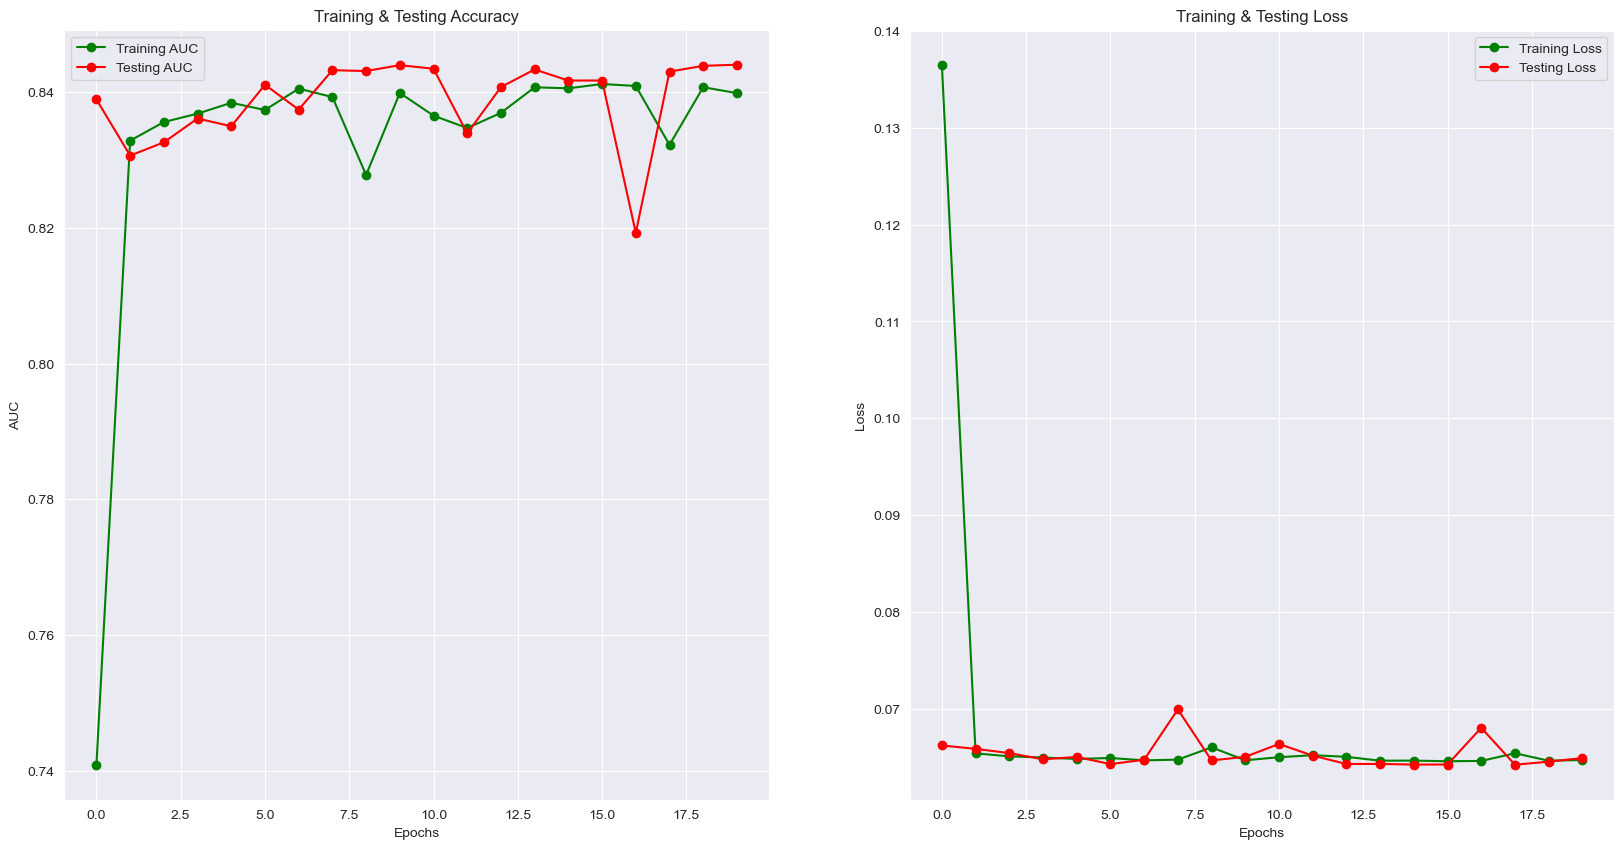

In [82]:
#Using validation set
history = auto_best_history_auc

epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_auc = history['auc_13']
train_loss = history['loss']
train_acc = history['accuracy']
val_auc = history['val_auc_13']
val_loss = history['val_loss']
val_acc = history['val_accuracy']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_auc , 'go-' , label = 'Training AUC')
ax[0].plot(epochs , val_auc , 'ro-' , label = 'Testing AUC')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("AUC")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")


Text(0, 0.5, 'Loss')

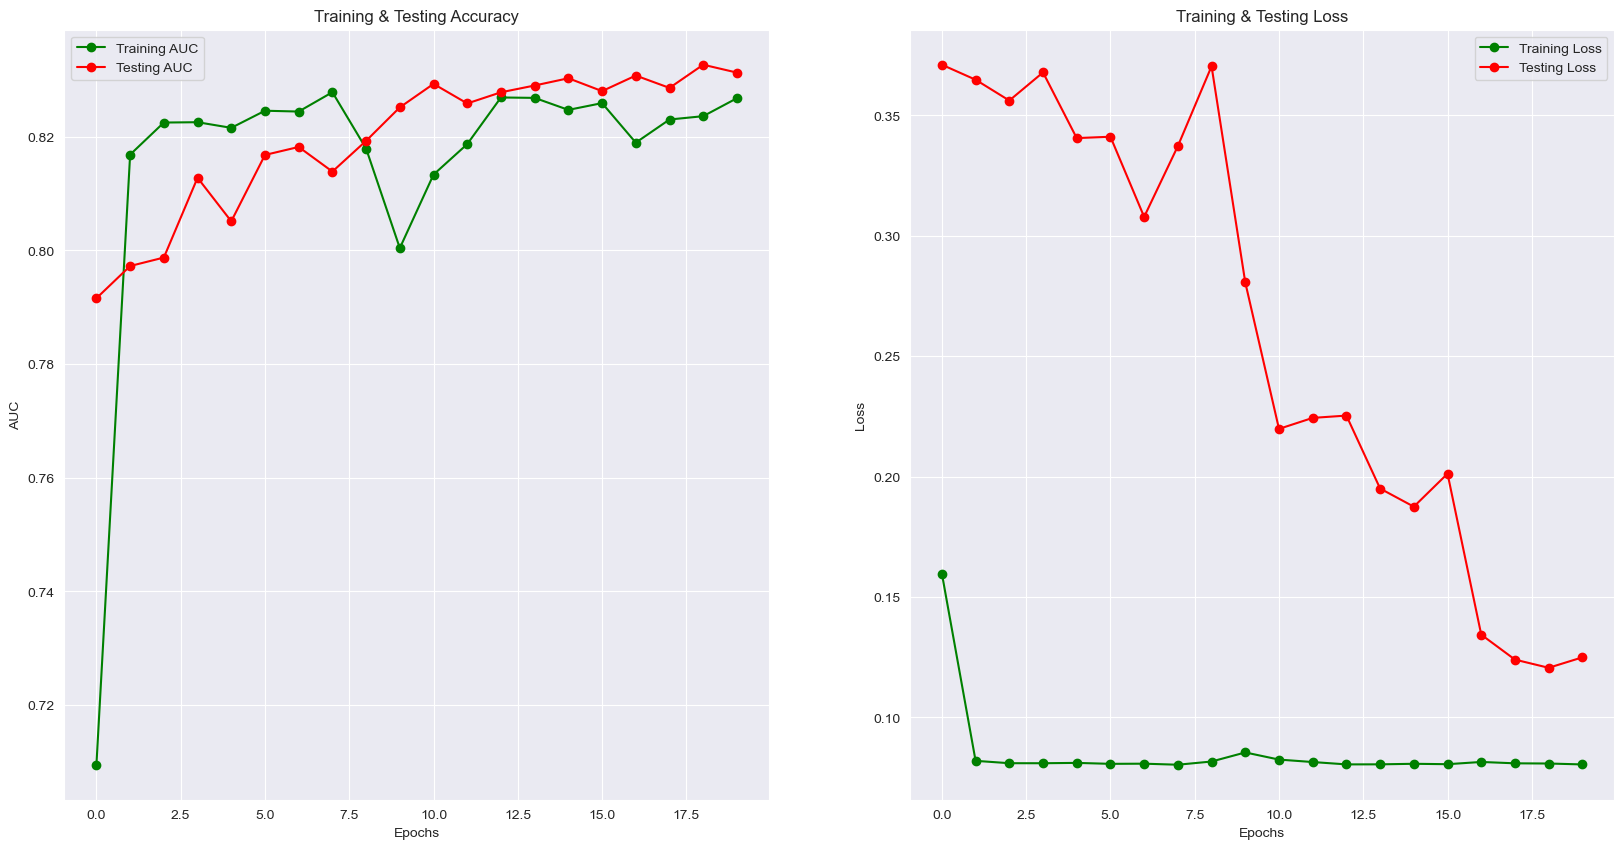

In [80]:
history = nn_best_history_auc
epochs = [i for i in range(20)]

fig , ax = plt.subplots(1,2)
train_auc = history['auc_8']
train_loss = history['loss']
train_acc = history['accuracy']
val_auc = history['val_auc_8']
val_loss = history['val_loss']
val_acc = history['val_accuracy']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_auc , 'go-' , label = 'Training AUC')
ax[0].plot(epochs , val_auc , 'ro-' , label = 'Testing AUC')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("AUC")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")


445/445 [==============================] - 1s 3ms/step


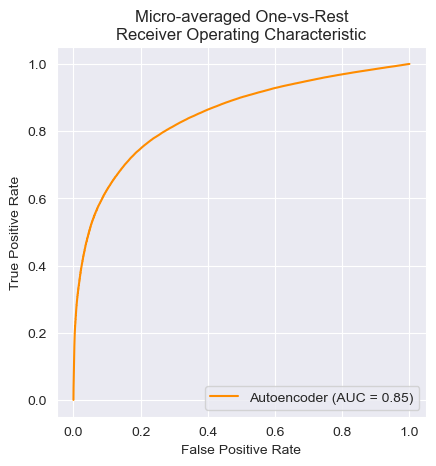

In [83]:
#Plot ROC curve for the two different models
from sklearn.metrics import RocCurveDisplay
import timeit


#benchmark for autoencoder
y_pred = auto_best_model_auc.predict(val_df)
#benchmark for neural networks

#y_pred2 = nn_best_model_auc.predict(val_df)


fig, ax = plt.subplots()

roc_display_autoencoder = RocCurveDisplay.from_predictions(val_lable.to_numpy().ravel(),
    y_pred.ravel(), name='Autoencoder', color="darkorange", ax=ax)
#roc_display_nn = RocCurveDisplay.from_predictions(val_lable.to_numpy().ravel(), y_pred2.ravel(), name='Neural Networks', color="blue", ax=ax,plot_chance_level=True)

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")

# Show the plot
plt.show()

In [ ]:
time1 = timeit.repeat("auto_best_model_auc.predict(val_df)", setup="from __main__ import auto_best_model_auc, val_df", number=100)
time2 = timeit.repeat("nn_best_model_auc.predict(val_df)", setup="from __main__ import nn_best_model_auc, val_df", number=100)

print("Autoencoder: ", np.mean(time1)/100)
print("Neural Networks: ", np.mean(time2)/100)

In [ ]:
#model comparison
#autoencoder
